In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/content/sample_data/car_data.csv')
data

,Horsepower,Weight,Engine_Size,Price
0,130,3504,2.5,20000
1,165,3693,3.0,25000
2,150,3436,2.8,23000
3,140,3449,2.2,21000
4,198,4341,3.8,32000
5,220,4354,4.0,35000
6,215,4732,4.5,37000
7,225,4380,4.6,39000
8,190,3850,3.3,31000
9,170,3560,2.9,27000


In [3]:
x = data[['Horsepower','Weight','Engine_Size']]
y = data['Price']

In [4]:
x = tf.constant(x,dtype=tf.float32)
y = tf.constant(y,dtype=tf.float32)

In [5]:
print("Feature Tensor Shape:" , x.shape)
print("Target Tensor Shape:" , y.shape)

Feature Tensor Shape: (10, 3)
Target Tensor Shape: (10,)


In [6]:
model = tf.keras.Sequential([ #16,8 -> number of neural, dense = fully connected
    tf.keras.layers.Dense(16,activation='relu'), #16 hidden layer, ReLU (Rectified Linear Unit)
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1) # 1 output
])


In [7]:
# optimizer='adam' → how the model updates weights
# loss='mse' → what the model tries to minimize
# metrics=['mae'] → extra metric shown for monitoring performance

model.compile(optimizer = 'adam', loss = 'mae', metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
#model repeats the training 200 times
#Verbose 0 = Silent mode (no output shown), hide training logs
#Verbose 1 = Shows a progress bar, Epoch 1/200 [=======>...]
#Verbose 2 = Shows one line per epoch, Epoch 1/200 — loss: 0.25 — acc: 0.93
history = model.fit(x,y,epochs=200,verbose=0)

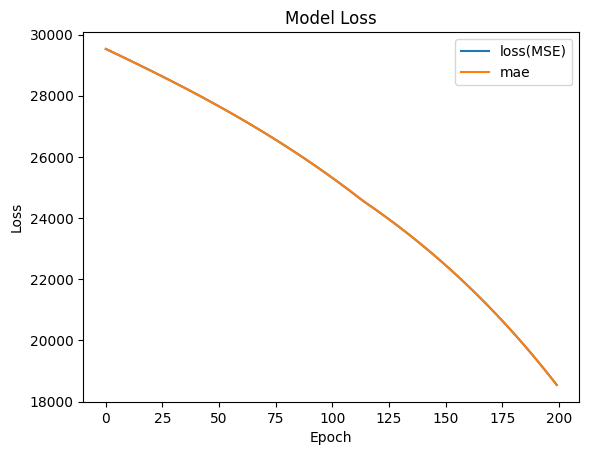

In [9]:
plt.plot(history.history['loss'], label= 'loss(MSE)')
plt.plot(history.history['mae'], label= 'mae')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [10]:
test_sample=np.array([[160,3550,2.5]])
prediction=model.predict(test_sample)
print('Predicted price',prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted price 9526.116
